# Importing Modules

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collection and Processing

In [13]:
data = pd.read_csv('gld_price_data.csv')
#SPX - S&P 500
#USO - United States Oil
#SLV - Silver
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [14]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [15]:
data.shape

(2290, 6)

# Data Cleaning

In [16]:
data.drop_duplicates()
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [17]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation Analysis

In [18]:
correlation=data.corr()
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<AxesSubplot:>

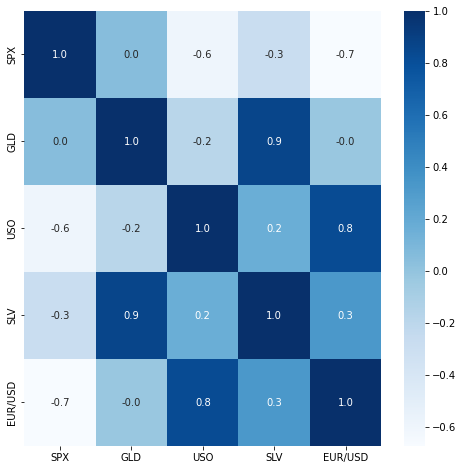

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,fmt='.1f',cmap='Blues',annot=True)

In [20]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

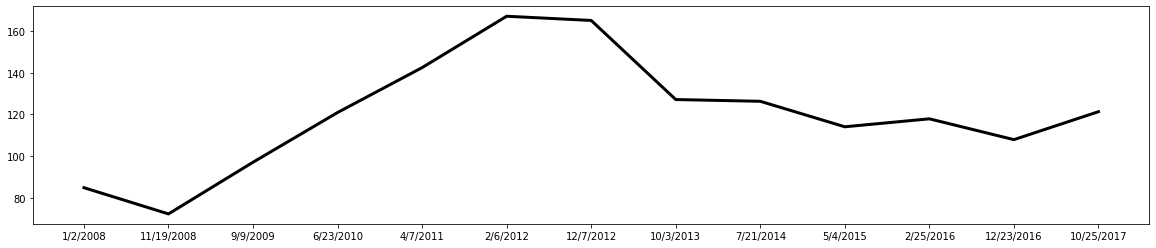

In [21]:
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(4)
plt.plot(data['Date'][::180],data['GLD'][::180],color='black',label='Gold Price',linewidth=3)

# Splitting Features (X) and Target (Y)

In [22]:
X=data.drop(['Date','GLD'],axis=1)
Y=data['GLD']

# Test Train Split

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

# Model Training

In [24]:
regressor=RandomForestRegressor(n_estimators=50)
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=50)

# Model Evaluation

In [25]:
Y_pred=regressor.predict(X_test)

In [26]:
r2score=metrics.r2_score(Y_test,Y_pred)
print("R squared error : %.4f"%r2score)
meanerror=metrics.mean_absolute_error(Y_test,Y_pred)
print("Mean Absolute Error : %.4f"%meanerror)

R squared error : 0.9893
Mean Absolute Error : 1.3158


# Comparision Of Values using Plot

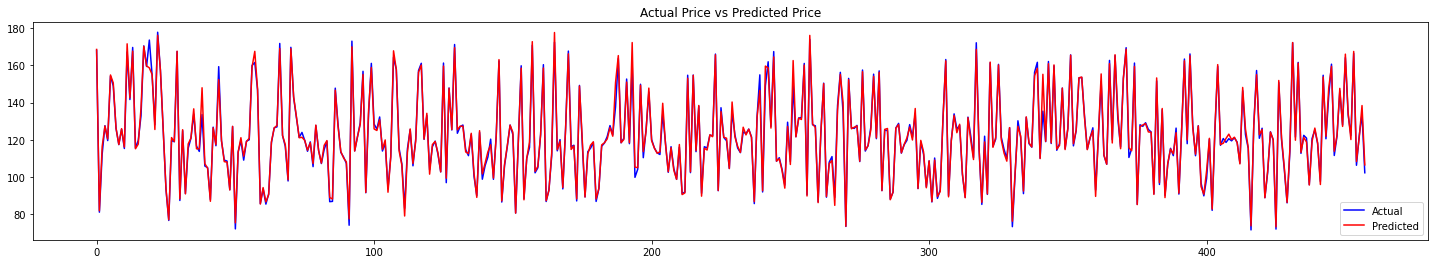

In [27]:
f=plt.figure()
f.set_figwidth(25)
f.set_figheight(4)
y_test=list(Y_test)
plt.plot(y_test,color='blue',label='Actual')
y_pred=list(Y_pred)
plt.plot(y_pred,color='red',label='Predicted')
plt.title("Actual Price vs Predicted Price")
plt.legend()
plt.show()


In [28]:
X_test.to_pickle('xtest.pkl')
Y_test.to_pickle('ytest.pkl')
